## Import Required Libraries

In [5]:
## load all libraries
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder as le ,MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import math
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from xgboost import XGBRegressor 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score, KFold, learning_curve

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# preprocessing libraries

## Load Dataset

In [6]:
df = pd.read_csv("C:/Users/ac/Data Science/Capstone Project 1/Train.csv")
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [7]:
df1 = pd.read_csv("C:/Users/ac/Data Science/Capstone Project 1/Test.csv")
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [8]:
df2 = pd.read_csv("C:/Users/ac/Data Science/Capstone Project 1/Sample_Submission.csv")
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


## Basic Dataset information

In [9]:
print('Train data contains', df.shape[0], 'rows and', df.shape[1], 'columns')
print('Train data contains', df1.shape[0], 'rows and', df1.shape[1], 'columns')

Train data contains 330045 rows and 7 columns
Train data contains 141448 rows and 6 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [ ]:
# DROPPING THE UNWANTED COLUMN (ID) 
df.drop(columns=["ID"], inplace=True)

In [31]:
df.columns

Index(['Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

In [13]:
df["Tag"].describe()

count     330045
unique        10
top            c
freq       72458
Name: Tag, dtype: object

In [14]:
df["Tag"].value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

<AxesSubplot:>

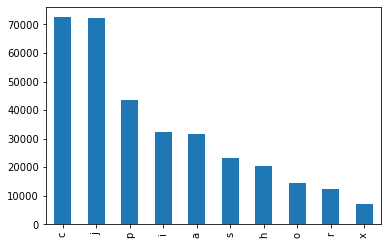

In [15]:
df["Tag"].value_counts().plot(kind="bar")

In [16]:
# setting the decimal place as 2
pd.set_option("float_format",lambda x :"%.2f" %x)

In [17]:
df["Reputation"].describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

count    330045.00
mean       7773.15
std       27061.41
min           0.00
1%            0.00
2%            0.00
3%            8.00
4%           14.00
5%           21.00
10%          54.00
25%         282.00
50%        1236.00
75%        5118.00
90%       16651.00
95%       32209.00
96%       38658.00
97%       49761.00
98%       67157.00
99%      113925.00
max     1042428.00
Name: Reputation, dtype: float64

In [18]:
df["Answers"].describe()

count   330045.00
mean         3.92
std          3.58
min          0.00
25%          2.00
50%          3.00
75%          5.00
max         76.00
Name: Answers, dtype: float64

In [19]:
df["Username"].describe()

count   330045.00
mean     81442.89
std      49215.10
min          0.00
25%      39808.00
50%      79010.00
75%     122559.00
max     175738.00
Name: Username, dtype: float64

In [20]:
df["Views"].describe()

count    330045.00
mean      29645.07
std       80956.46
min           9.00
25%        2594.00
50%        8954.00
75%       26870.00
max     5231058.00
Name: Views, dtype: float64

In [21]:
df["Upvotes"].describe()

count   330045.00
mean       337.51
std       3592.44
min          0.00
25%          8.00
50%         28.00
75%        107.00
max     615278.00
Name: Upvotes, dtype: float64

## Checking For null values

In [22]:
# finding the no. of null values in both train and test
print(df.isnull().sum())
print(df1.isnull().sum())

Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64
ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64


## Checking and Describing Outliers

In [23]:
df.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Reputation,330045.00,7773.15,27061.41,0.00,0.00,0.00,8.00,14.00,21.00,54.00,282.00,1236.00,5118.00,16651.00,32209.00,38658.00,49761.00,67157.00,113925.00,1042428.00
Answers,330045.00,3.92,3.58,0.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00,5.00,8.00,10.00,11.00,12.00,14.00,18.00,76.00
Username,330045.00,81442.89,49215.10,0.00,1784.00,3291.88,4587.00,6107.76,7296.00,15299.00,39808.00,79010.00,122559.00,150672.60,163922.00,167044.48,169575.00,171827.00,173837.00,175738.00
Views,330045.00,29645.07,80956.46,9.00,78.00,122.00,177.00,239.00,310.00,722.00,2594.00,8954.00,26870.00,68290.40,116699.80,136875.68,166663.40,216458.72,316887.04,5231058.00
Upvotes,330045.00,337.51,3592.44,0.00,0.00,0.00,1.00,1.00,1.00,3.00,8.00,28.00,107.00,411.00,959.00,1247.00,1709.00,2660.00,5030.00,615278.00


In [24]:
# removing outlier from the data using inter - quaartile range method

def outlier_removal(df,attributes,n):
    # take loop through the attributes
    outliers_indices = []
    for col in attributes:
        # calculating inter-quartile range
        Q1 = df[col].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = df[col].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        index = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outliers_indices.extend(index)
    # finding index which have more than 2
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(k for k,v in outliers_indices.items() if v>n) # n tells the no. of outliers present in an example for removal
    return multiple_outliers 

In [25]:
# identifying the number of outliers in each row 
index_list_count = []
for i in range(len(df.columns[2:6])):
    multioutlier_indices = outlier_removal(df,df.columns[2:6],i)
    print('There are {} no. of examples which have outliers in {} columns '.format(len(multioutlier_indices), i+1))
    index_list_count.append(len(multioutlier_indices))      
    print('the examples for this are',df.loc[multioutlier_indices] )  

There are 68146 no. of examples which have outliers in 1 columns 
the examples for this are        Tag  Reputation  Answers  Username     Views  Upvotes
1        a    26046.00    12.00     21781  55801.00  1175.00
26       c      569.00    12.00    116775  38443.00    57.00
37       h    18404.00    13.00     73061 118423.00  2963.00
46       i        0.00    22.00     45812  45331.00    30.00
60       a    12951.00    10.00      9362  33325.00   675.00
...     ..         ...      ...       ...       ...      ...
329988   s     8908.00     6.00      7230  26949.00   413.00
329996   i     8771.00     5.00     45973  51089.00   460.00
329997   a     6562.00     1.00     92144  46086.00   349.00
330032   c    34577.00     4.00     14252  61238.00  1276.00
330039   s    84007.00     5.00     78311   5335.00   742.00

[68146 rows x 6 columns]
There are 26541 no. of examples which have outliers in 2 columns 
the examples for this are        Tag  Reputation  Answers  Username     Views  Upvot

Text(0.5, 1.0, 'plot for examples vs outlier columns ')

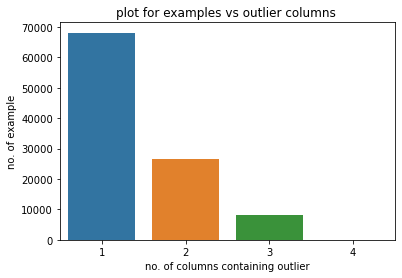

In [30]:
sns.barplot(x = [1,2,3,4],y = index_list_count)
plt.ylabel('no. of example')
plt.xlabel('no. of columns containing outlier')
plt.title('plot for examples vs outlier columns ')

## Checking Correlation

In [44]:
# correlation table 
df.corr()

,Reputation,Answers,Username,Views,Upvotes
Reputation,1.00,0.07,-0.04,0.04,0.27
Answers,0.07,1.00,-0.01,0.50,0.20
Username,-0.04,-0.01,1.00,0.00,-0.01
Views,0.04,0.50,0.00,1.00,0.44
Upvotes,0.27,0.20,-0.01,0.44,1.00


<AxesSubplot:>

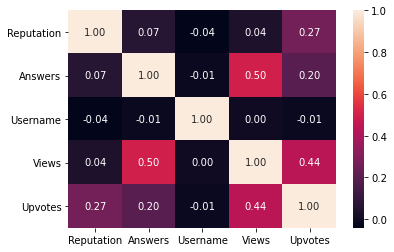

In [41]:
# heatmap of correlation
sns.heatmap(df.iloc[:,1:].corr(),annot = True, fmt = '.2f')

#### With the help of correlation table and heatmap we can define that username doesn't have any significant effect on upvotes.

## Analyzing, Transforming and Outlier treatment 

In [34]:
# dropping id to be not used for prediction in any way
df1.drop('ID',axis=1,inplace=True)  

In [35]:
# concating the test data (df1) an train data (df) to apply same operations
dataset = pd.concat(objs = [df,df1],axis=0,sort=True).reset_index(drop=True)
print(len(dataset))
dataset

471493


,Answers,Reputation,Tag,Upvotes,Username,Views
0,2.00,3942.00,a,42.00,155623,7855.00
1,12.00,26046.00,a,1175.00,21781,55801.00
2,4.00,1358.00,c,60.00,56177,8067.00
3,3.00,264.00,a,9.00,168793,27064.00
4,4.00,4271.00,c,83.00,112223,13986.00
...,...,...,...,...,...,...
471488,4.00,4681.00,j,NaN,152060,2469.00
471489,3.00,7782.00,j,NaN,89235,18998.00
471490,5.00,435.00,p,NaN,119788,57048.00
471491,3.00,176.00,o,NaN,86824,10193.00


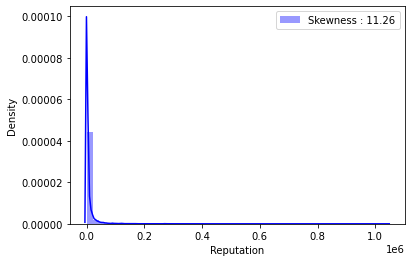

In [37]:
# Attribute number 1- Reputation
g = sns.distplot(dataset["Reputation"], color="b", label="Skewness : %.2f"%(dataset["Reputation"].skew()))
g.legend(loc='best')

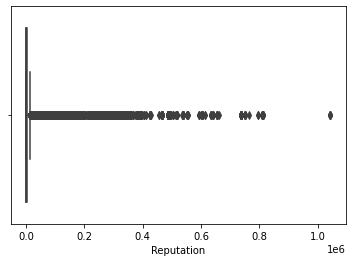

In [49]:
g = sns.boxplot(dataset['Reputation'],orient="h" )

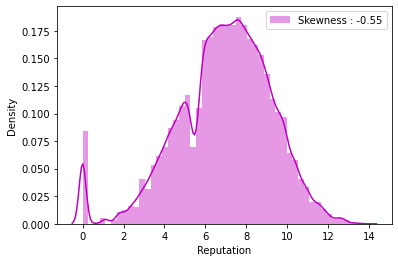

In [50]:
# Treating outliers for this column as there are huge no. of outliers
dataset['Reputation'] = dataset['Reputation'].map(lambda i:np.log(i) if i>0 else 0)
g = sns.distplot(dataset["Reputation"], color="m", label="Skewness : %.2f"%(dataset["Reputation"].skew()))
g.legend(loc='best')

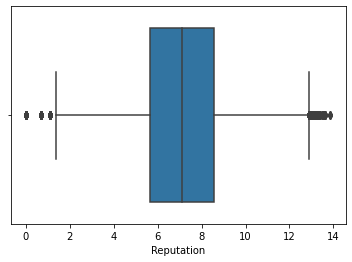

In [51]:
# checking box plot after outlier treatment
g = sns.boxplot(dataset['Reputation'])

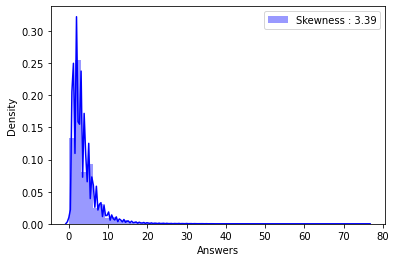

In [55]:
# Attribute number 2- Answers
g = sns.distplot(dataset["Answers"], color="b", label="Skewness : %.2f"%(dataset["Answers"].skew()))
g.legend(loc='best')

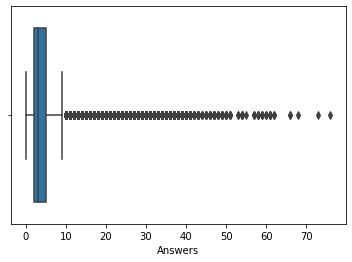

In [56]:
g = sns.boxplot(dataset['Answers'])

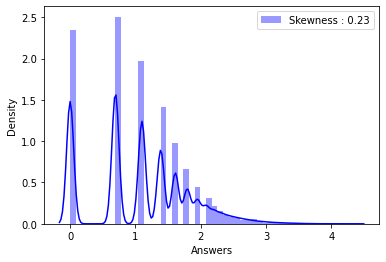

In [57]:
# Again treating outliers for this column as there are huge no. of outliers
dataset['Answers'] = dataset['Answers'].map(lambda i:np.log(i) if i>0 else 0)
g = sns.distplot(dataset["Answers"], color="b", label="Skewness : %.2f"%(dataset["Answers"].skew()))
g.legend(loc='best')

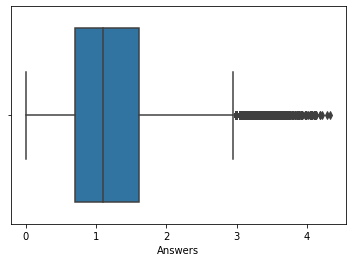

In [58]:
# checking box plot after outlier treatment
g = sns.boxplot(dataset['Answers'])

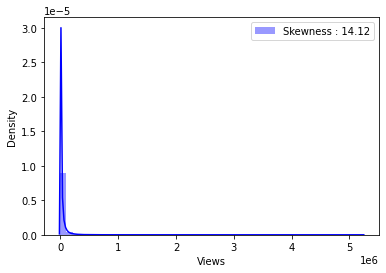

In [59]:
# Attribute number 3- Views
g = sns.distplot(dataset["Views"], color="b", label="Skewness : %.2f"%(dataset["Views"].skew()))
g.legend(loc='best')

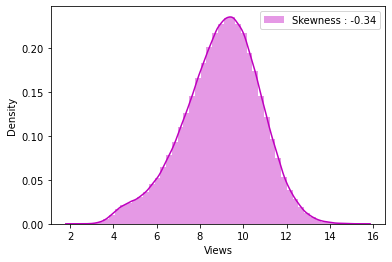

In [60]:
# Again treating outliers for this column as there are huge no. of outliers
dataset['Views'] = dataset['Views'].map(lambda i:np.log(i) if i>0 else 0)
g = sns.distplot(dataset["Views"], color="m", label="Skewness : %.2f"%(dataset["Views"].skew()))
g.legend(loc='best')

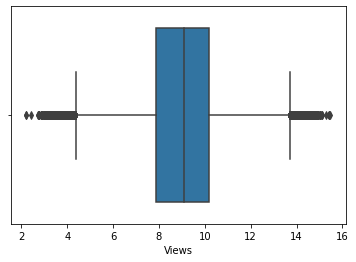

In [61]:
# checking box plot after outlier treatment
g = sns.boxplot(dataset['Views'])

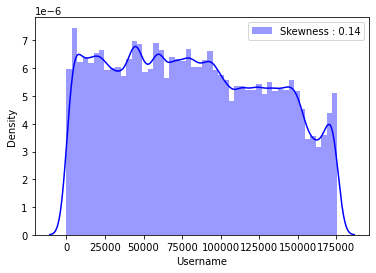

In [62]:
# Attribute number 4- Username
g = sns.distplot(dataset["Username"], color="b", label="Skewness : %.2f"%(dataset["Username"].skew()))
g.legend(loc='best')

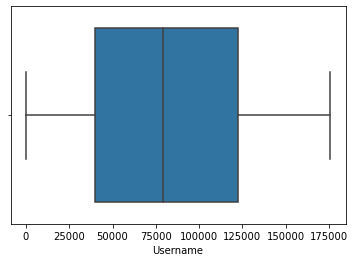

In [63]:
# checking box plot
g = sns.boxplot(dataset['Username'])

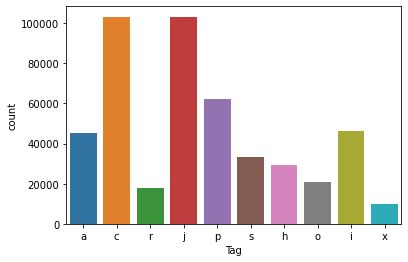

In [64]:
# Attribute number 5- Tags
g = sns.countplot("Tag", data = dataset)

## Label Encoding

In [68]:
dataset['Tag'] = le().fit_transform(dataset['Tag'])

In [74]:
dataset["Tag"].value_counts()

1    103251
4    103043
6     62120
3     46500
0     45253
8     33411
2     29346
5     20842
7     17755
9      9972
Name: Tag, dtype: int64

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Answers     471493 non-null  float64
 1   Reputation  471493 non-null  float64
 2   Tag         471493 non-null  int64  
 3   Upvotes     330045 non-null  float64
 4   Username    471493 non-null  int64  
 5   Views       471493 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 21.6 MB


## Checking PCA variance of each feature

In [77]:
# firstly applying features scaling
sd = MinMaxScaler()
norm1 = sd.fit(dataset[['Answers','Reputation','Username','Views']])
x = norm1.transform(dataset[['Answers','Reputation','Username','Views']])
x.shape

(471493, 4)

In [78]:
x

array([[0.16005307, 0.59748905, 0.88553984, 0.51018852],
       [0.57378427, 0.73374996, 0.12394018, 0.65790617],
       [0.32010615, 0.52058421, 0.31966336, 0.51219497],
       ...,
       [0.37163173, 0.43842955, 0.68162833, 0.65957131],
       [0.25367812, 0.37312986, 0.49405365, 0.52981882],
       [0.16005307, 0.46719068, 0.58177514, 0.54688904]])

In [79]:
dataset[['Answers','Reputation','Username','Views']] = x[:,:]
dataset.describe()

,Answers,Reputation,Tag,Upvotes,Username,Views
count,471493.00,471493.00,471493.00,330045.00,471493.00,471493.00
mean,0.25,0.50,3.55,337.51,0.46,0.51
std,0.17,0.17,2.49,3592.44,0.28,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.16,0.41,1.00,8.00,0.23,0.43
50%,0.25,0.51,4.00,28.00,0.45,0.52
75%,0.37,0.62,6.00,107.00,0.70,0.60
max,1.00,1.00,9.00,615278.00,1.00,1.00


In [81]:
# slicing back to train and test set
y_train = np.array(dataset['Upvotes'],dtype = np.int64)[0:len(df)]
x_train = dataset[0:len(df)][['Answers','Reputation','Tag','Username','Views']]
x_test = dataset[len(df):][['Answers','Reputation','Tag','Username','Views']]
print(x_train.shape,x_test.shape,y_train.shape)

(330045, 5) (141448, 5) (330045,)


In [82]:
# again applying PCA with 8 features
# identifying which features adds how much variance to data


covar_matrix = PCA(n_components = 5) #we have 8 numerical features
covar_matrix.fit(dataset[['Answers','Reputation','Tag','Username','Views']])
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(variance, decimals=3)*100)
components = covar_matrix.fit_transform(dataset[['Answers','Reputation','Tag','Username','Views']])
var #cumulative sum of variance explained with [n] features

array([ 97.6,  98.8,  99.4,  99.8, 100. ])

In [83]:
# checking importance using pvalue 
# Applying p-value to check feature dependence
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              1882.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:06:36   Log-Likelihood:                     -3.1671e+06
No. Observations:              330045   AIC:                                  6.334e+06
Df Residuals:                  330040   BIC:                                  6.334e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Answers     1735.0095     42.601     40.727      0.000    1651.512    1818.507
Reputation   840.3183     33.149     25.350      0.000     775.348     905.289
Tag          -43.4670      2.368    -18.356      0.000     -48.108     -38.826
Username    -589.2666     20.743    -28.408      0.000    -629.922    -548.611
Views          3.8047     44.107      0.086      0.931     -82.643      90.252
==============================================================================
Omnibus:                  1197235.857   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1158093756322.303
Skew:                          75.564   Prob(JB):                         0.00
Kurtosis:                    9178.548   Cond. No.                         40.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

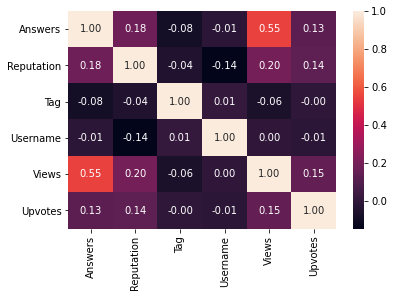

In [87]:
# making heatmap of correlation
sns.heatmap(pd.concat([x_train,pd.DataFrame(y_train, columns= ['Upvotes'])],axis=1).corr(),annot = True, fmt = '.2f')

In [88]:
index_list_count1 = []
for i in range(len(x_train.columns)):
    multioutlier_indices = outlier_removal(x_train,x_train.columns,i)
    print('There are {} no. of examples which have outliers in {} columns '.format(len(multioutlier_indices), i+1))
    index_list_count1.append(multioutlier_indices)      
    print('the examples for this are',df.loc[multioutlier_indices] ) 

There are 14140 no. of examples which have outliers in 1 columns 
the examples for this are        Tag  Reputation  Answers  Username     Views  Upvotes
46       i        0.00    22.00     45812  45331.00    30.00
95       j        2.29    41.00     23334 752007.00 12565.00
257      p        2.18    25.00     66014 414160.00  2507.00
302      i        1.86    21.00     45715 116632.00   287.00
393      c        1.88    25.00     23827 201770.00   126.00
...     ..         ...      ...       ...       ...      ...
329521   j        0.94     2.00     63039     67.00   167.00
329721   c        1.58     1.00     77524     48.00     0.00
329723   p        1.26     0.00    134069     32.00     0.00
329858   j        1.75     0.00     89809     57.00     1.00
330009   s        1.93     1.00    118285     71.00   116.00

[14140 rows x 6 columns]
There are 550 no. of examples which have outliers in 2 columns 
the examples for this are        Tag  Reputation  Answers  Username      Views   Upvot

In [89]:
#x_val1 = x_train.loc[index_list_count1[0]]
#y_val1 = pd.DataFrame(y_train).loc[index_list_count1[0]]
x_train = x_train.drop(index_list_count1[0])
len(x_train)

315905

In [90]:
y_train = pd.DataFrame(y_train).drop(index_list_count1[0])
len(y_train)

315905

In [91]:
# Applying train - val split

x_train,x_val,y_train,y_val  = train_test_split(x_train,y_train,test_size = 0.2, random_state=42)
x_val

,Answers,Reputation,Tag,Username,Views
39463,0.32,0.43,2,0.02,0.64
200850,0.25,0.59,1,0.64,0.36
133526,0.00,0.63,4,0.20,0.60
221999,0.32,0.41,1,0.23,0.46
26821,0.25,0.43,4,0.18,0.57
...,...,...,...,...,...
202296,0.37,0.67,6,0.28,0.46
295385,0.00,0.50,1,0.00,0.51
321192,0.16,0.67,3,0.98,0.56
39020,0.16,0.65,3,0.17,0.62


In [92]:
# dropping two columns in all

x_train.drop(['Username','Tag'],axis=1,inplace = True)
x_val.drop(['Username','Tag'],axis=1,inplace = True)
x_test.drop(['Tag','Username'],axis=1,inplace = True)

## MODEL BUILDING

In [104]:
# to import linear regression model
from sklearn.linear_model import LinearRegression

In [106]:
# creating an object of linear regression
Lr=LinearRegression()

In [107]:
# to create the model with all features(variables)
Lr.fit(x_train, y_train)

LinearRegression()

In [109]:
# to check the R square 
Lr.score(x_train,y_train)

0.08044169925411404

In [110]:
Lr.coef_

array([[ 413.36099601, 2163.72402245, 2025.23573034]])

In [112]:
r_sqr=Lr.score(x_train, y_train)

In [113]:
# adj r_square
1- ( 1-r_sqr)*(109-1)/ (109-12-1)

-0.034503088339121746